In [23]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import math

In [24]:
df = pd.read_csv('./view_tpgs_farmer_bodyweight_combine.csv')
df.shape

(12618, 52)

In [25]:
# df = df[df['country_name'] == 'Ethiopia']
# df = df[df['farmer_introbirdstrainname'] == 'SASSO']

df.shape

(12618, 52)

In [26]:
df = df[[
    'country_name',
    'farmer_introbirdstrainname',
    'form_datecollection',
    'farmer_introbirdstrain_hatchdate',
    'adminlevel1_name',
    'adminlevel2_name', 
    'adminlevel3_name', 
    'adminlevel4_name',
    'farmer_fullname',
    'introbirds_ageindays',
    'introbirds_ageinweeks',
    'introduced_all_count',	
    'introduced_all_weight', 
    'introduced_male_count', 
    'introduced_male_weight', 
    'introduced_female_count',	
    'introduced_female_weight'
]]

In [27]:
display(df[df.duplicated()].shape)
df.drop_duplicates(inplace=True)
display(df[df.duplicated()].shape)
display(df.shape)

(44, 17)

(0, 17)

(12574, 17)

In [28]:
df = df.drop(df[df['farmer_fullname'].isna()].index)

In [29]:
df.insert(loc=0, column='farmer_id', value=df.set_index([
    'adminlevel1_name',
    'adminlevel2_name', 
    'adminlevel3_name', 
    'adminlevel4_name',
    'farmer_fullname',
]).index.factorize()[0]+1)

df['farmer_id'].unique().shape

(818,)

farmer_introbirdstrainname
Bovans             3830
KALRO               534
Koekoek            2006
Kuroiler            510
Lac Son              73
Lac Thuy            119
Mong                120
Novogene Tinted      80
Redja                 8
Rirja                 1
SASSO              4454
Sassoli Red          76
Tetra H              79
Tetra Tint           77
dtype: int64

<Axes: ylabel='Frequency'>

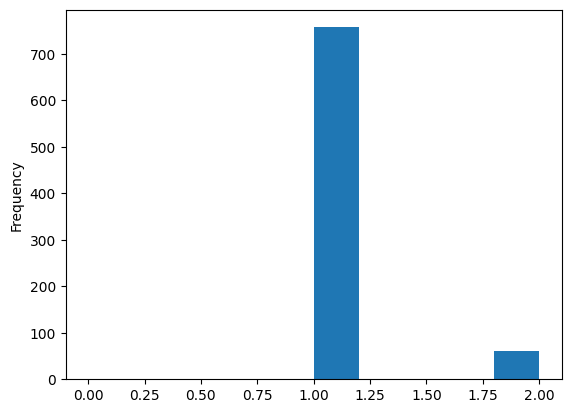

In [30]:
display(df.groupby('farmer_introbirdstrainname').size())

df.groupby('farmer_id')['farmer_introbirdstrainname'].nunique().plot(kind="hist")

In [31]:
u = df.groupby('farmer_id')['farmer_introbirdstrainname'].nunique() > 1

df[df['farmer_id'].isin(u[u == True].index)]['country_name'].unique()

array(['Vietnam'], dtype=object)

In [32]:
df['c_age_in_days'] = (df['form_datecollection'].astype('datetime64[ns]') - df['farmer_introbirdstrain_hatchdate'].astype('datetime64[ns]')).dt.days
df[df['c_age_in_days'] != df['introbirds_ageindays']].shape

(600, 19)

In [33]:
both_empty = df[
    (df['introduced_male_weight'] == 0) &
    (df['introduced_female_weight'] == 0)
]

df = df.drop(both_empty.index, axis=0)

In [34]:
# Drop Empty in introbirds_ageindays
df = df.drop(df[df['introbirds_ageindays'].isnull()].index, axis=0)
df = df.drop(df[df['introbirds_ageindays'] < 0].index, axis=0)

df.shape

(11053, 19)

In [35]:
df['intor_male_avg'] = df['introduced_male_weight'] / df['introduced_male_count']
df['intor_female_avg'] = df['introduced_female_weight'] / df['introduced_female_count']

<Axes: xlabel='introbirds_ageindays'>

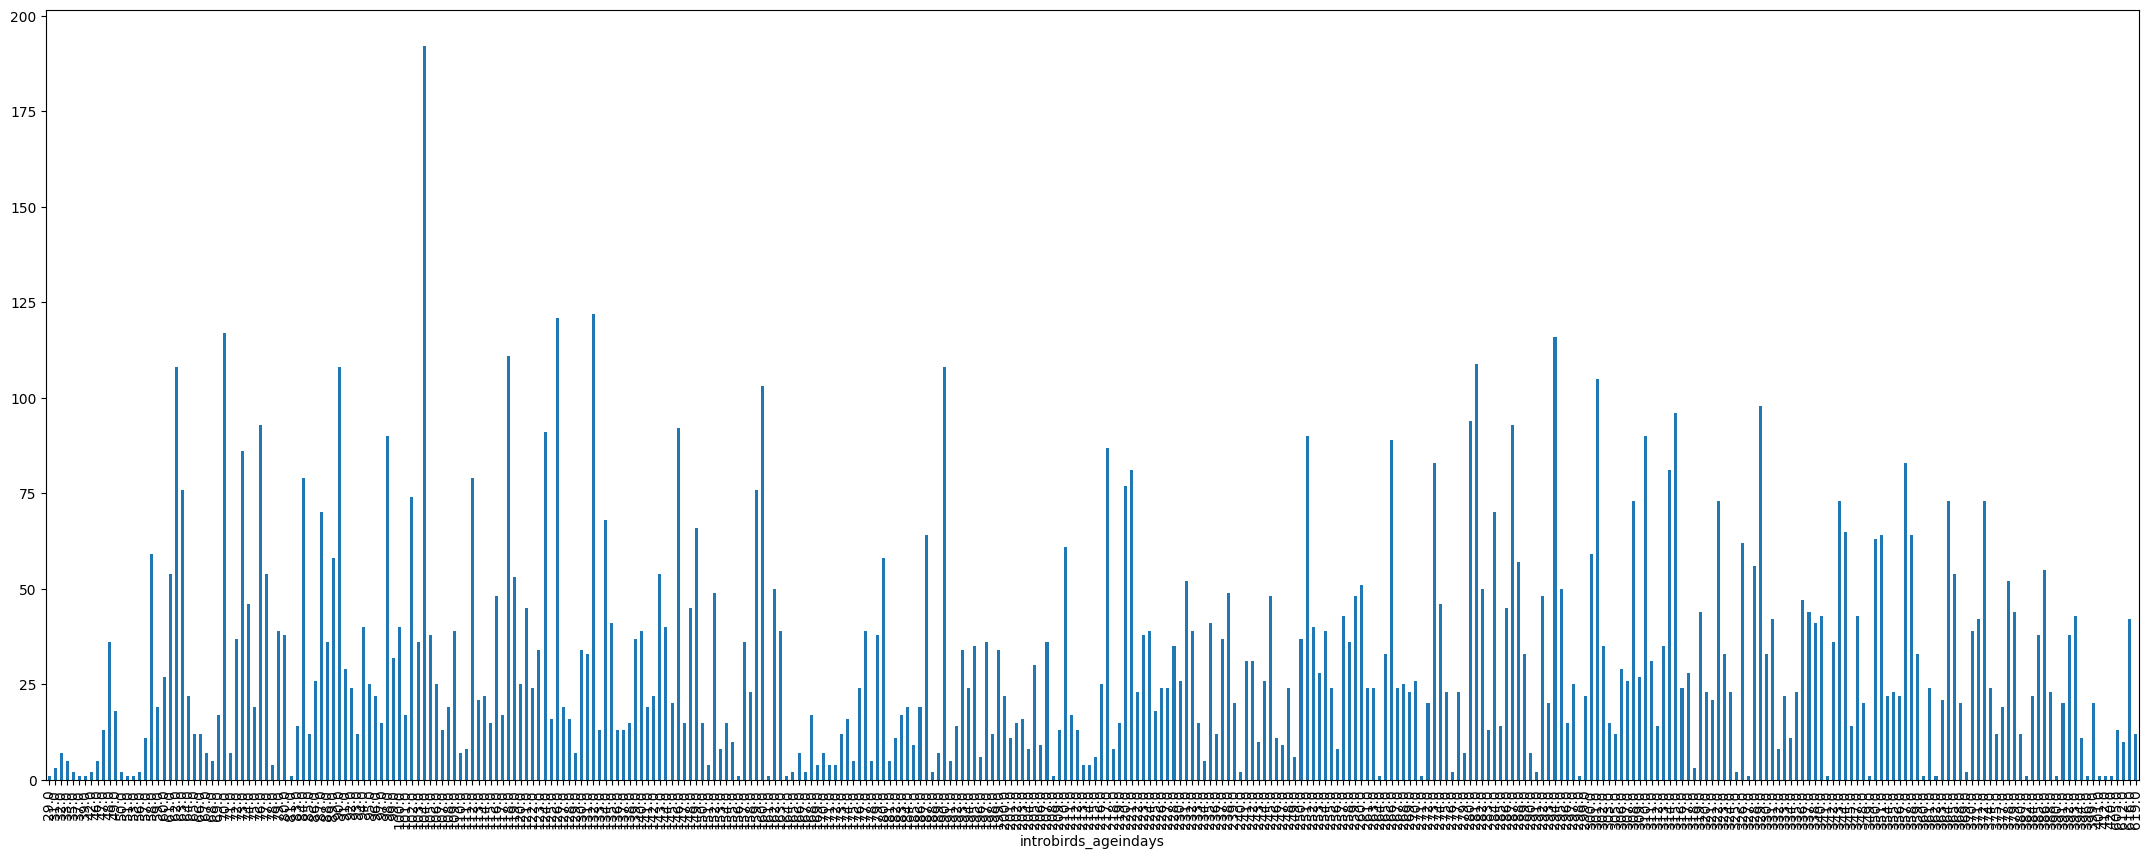

In [36]:
df.groupby('introbirds_ageindays').size().plot(kind="bar",figsize=(27, 10))

In [37]:
df[['introbirds_ageinweeks', 'introduced_female_weight']]['introbirds_ageinweeks'].max()

88.0

In [38]:
display(df['intor_male_avg'].describe())
display(df['intor_female_avg'].describe())

count    5855.000000
mean      773.287634
std       759.862398
min         0.090909
25%         1.000000
50%       689.722222
75%      1284.333333
max      8670.000000
Name: intor_male_avg, dtype: float64

count    9016.000000
mean     1168.905508
std       712.378703
min         1.000000
25%       655.737500
50%      1121.698370
75%      1660.838462
max      4012.000000
Name: intor_female_avg, dtype: float64

In [39]:
# Remove average body weight not in between 40 & 7000

min_body_weight = 40
max_body_weight = 4000

m_err = df[
    (df['intor_male_avg'] < min_body_weight) |
    (df['intor_male_avg'] > max_body_weight)
]

display(m_err.shape)
df = df.drop(m_err.index, axis=0)


f_err = df[
    (df['intor_female_avg'] < min_body_weight) |
    (df['intor_female_avg'] > max_body_weight)
]

display(f_err.shape)
df = df.drop(f_err.index, axis=0)

(2058, 21)

(828, 21)

In [40]:
display(df['intor_male_avg'].describe())
display(df['intor_female_avg'].describe())

count    3796.000000
mean     1188.615182
std       612.704027
min        40.000000
25%       718.460769
50%      1110.833333
75%      1526.212963
max      3577.750000
Name: intor_male_avg, dtype: float64

count    8147.000000
mean     1285.305831
std       636.528404
min        49.500000
25%       770.230303
50%      1211.000000
75%      1725.000000
max      3383.181818
Name: intor_female_avg, dtype: float64

In [41]:
# Duplicate rows
df_duplicates = df[df.duplicated(['farmer_id', 'introbirds_ageindays'], keep=False)].sort_values('farmer_id')

display(df_duplicates.shape)
df_duplicates.to_csv('./duplicates.csv')

(614, 21)

<Axes: ylabel='Frequency'>

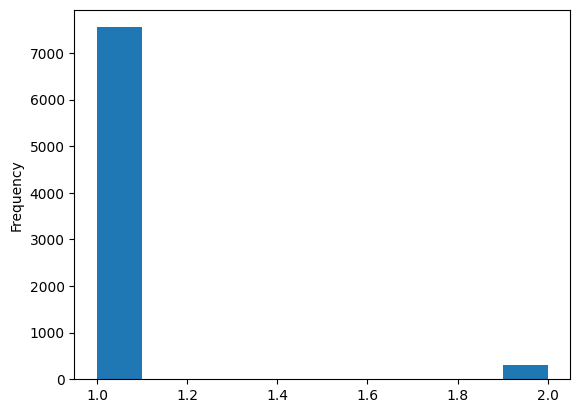

In [42]:
# Take rows with max chicken count

df['total_chicken_count'] = df['introduced_male_count'] + df['introduced_female_count']
df_groups = df.groupby(['farmer_id', 'farmer_fullname', 'introbirds_ageindays'])
df_groups.size().plot(kind='hist')

In [43]:
df_groups_max = df_groups.max('total_chicken_count')
# df_clean = df_groups_max.reset_index().drop('total_chicken_count', axis=1)
df_clean = df_groups_max.reset_index()

In [44]:
# df_clean[df_clean.duplicated(['farmer_id', 'introbirds_ageinweeks'])]

14

[8, 12, 16, 20]

C:\Users\FGetachew\AppData\Local\Temp\ipykernel_40156\2772943383.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist.groupby(pd.cut(df_dist['introbirds_ageinweeks'], ranges)).size().plot(kind="bar")


<Axes: xlabel='introbirds_ageinweeks'>

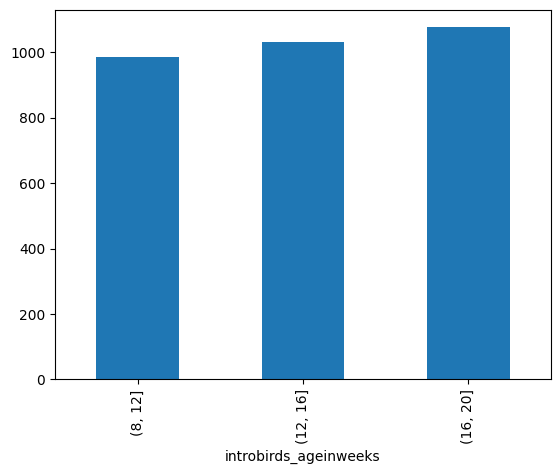

In [45]:
# Max week/range => 88 / 3 week

df_dist = df_clean

week_diff =  math.floor(
    (df_dist['introbirds_ageinweeks'].max() - df_dist['introbirds_ageinweeks'].min()) / 6
)

# ranges = (range(
#     int(df['introbirds_ageinweeks'].min()), 
#     int(df['introbirds_ageinweeks'].max()) + week_diff, 
#     week_diff
# ))
ranges = [8, 12, 16, 20]


# Week diffrence
display(week_diff)
display(ranges)
df_dist.groupby(pd.cut(df_dist['introbirds_ageinweeks'], ranges)).size().plot(kind="bar")

<Axes: ylabel='Frequency'>

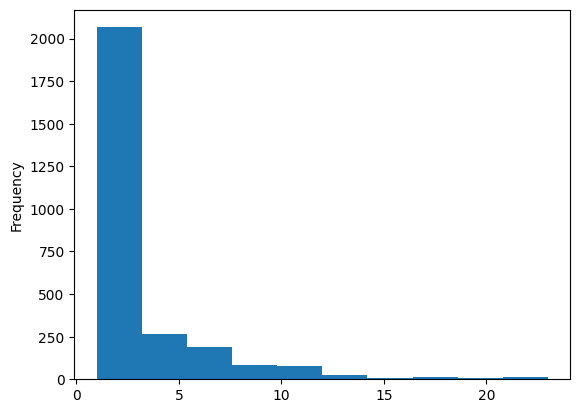

In [46]:
c = df.groupby(['farmer_id', 'total_chicken_count'])
c.size().plot(kind='hist')

C:\Users\FGetachew\AppData\Local\Temp\ipykernel_40156\13818414.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist.groupby(


<Axes: xlabel='introbirds_ageinweeks'>

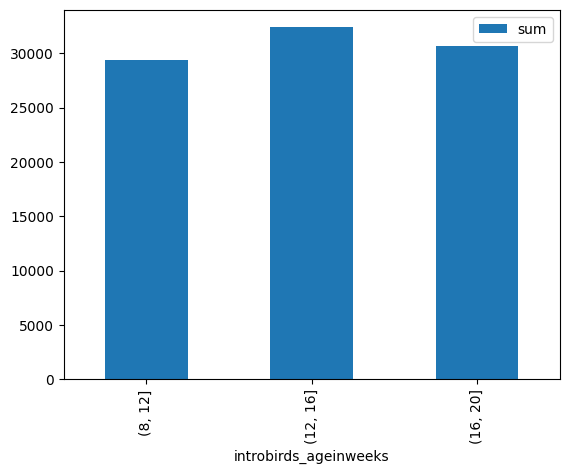

In [47]:
# Number of chicken in a given week
# df_dist.groupby(
#     pd.cut(df_dist['introbirds_ageinweeks'], ranges), 
#     as_index=False)['total_chicken_count'].agg(['size', 'sum']).plot(kind='bar',x='introbirds_ageinweeks', y='sum')
df_dist.groupby(
    pd.cut(df_dist['introbirds_ageinweeks'], ranges), 
    as_index=False)['total_chicken_count'].agg(['size', 'sum']).plot(kind='bar',x='introbirds_ageinweeks', y='sum')

C:\Users\FGetachew\AppData\Local\Temp\ipykernel_40156\3086741047.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist.groupby(
C:\Users\FGetachew\AppData\Local\Temp\ipykernel_40156\3086741047.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist.groupby(


<Axes: xlabel='introbirds_ageinweeks'>

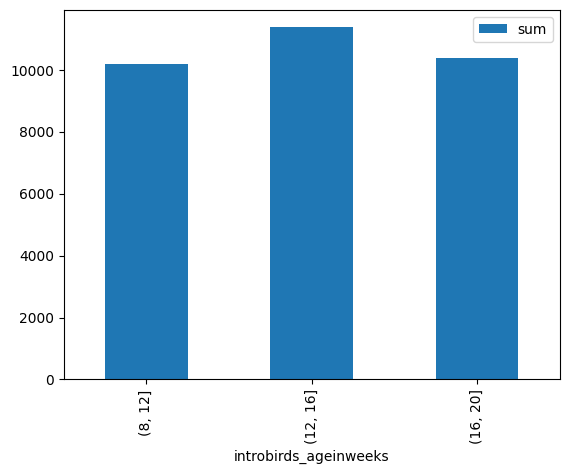

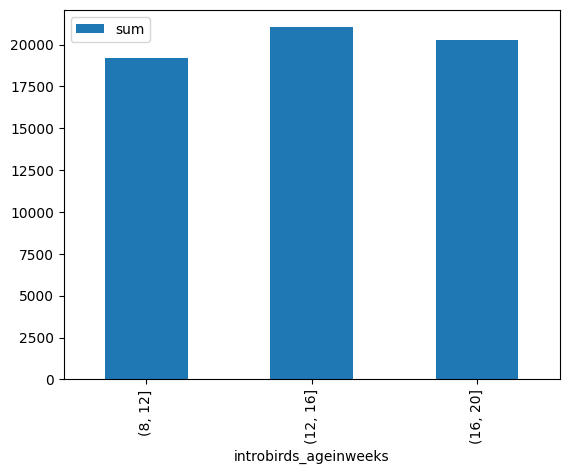

In [48]:
# Male count
df_dist.groupby(
    pd.cut(df_dist['introbirds_ageinweeks'], ranges), 
    as_index=False)['introduced_male_count'].agg(['size', 'sum']).plot(kind='bar',x='introbirds_ageinweeks', y='sum')

# Male count
df_dist.groupby(
    pd.cut(df_dist['introbirds_ageinweeks'], ranges), 
    as_index=False)['introduced_female_count'].agg(['size', 'sum']).plot(kind='bar',x='introbirds_ageinweeks', y='sum')

<Axes: xlabel='introbirds_ageinweeks'>

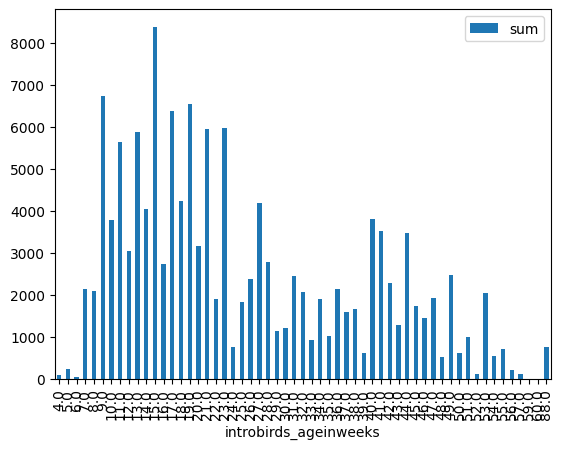

In [49]:
df_dist.groupby('introbirds_ageinweeks', 
    as_index=False)['introduced_female_count'].agg(['size', 'sum']).plot(kind='bar',x='introbirds_ageinweeks', y='sum')


C:\Users\FGetachew\AppData\Local\Temp\ipykernel_40156\37462087.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist.groupby(
C:\Users\FGetachew\AppData\Local\Temp\ipykernel_40156\37462087.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist.groupby(


<Axes: xlabel='introbirds_ageinweeks'>

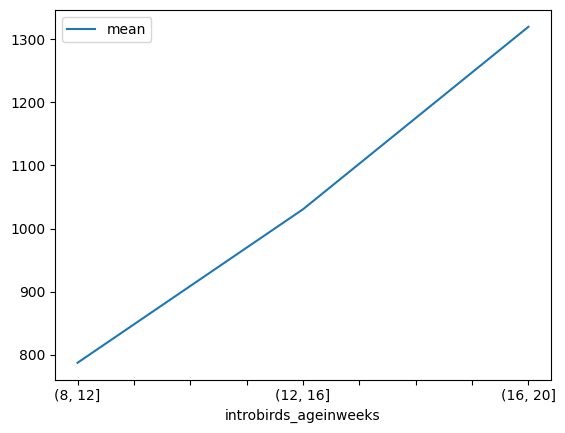

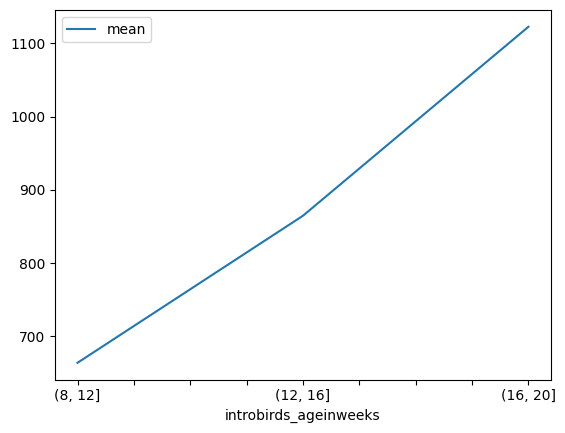

In [50]:
# Average body weight
df_dist.groupby(
    pd.cut(df_dist['introbirds_ageinweeks'], ranges), 
    as_index=False)['intor_male_avg'].agg(['size', 'mean']).plot(kind='line',x='introbirds_ageinweeks', y='mean')

df_dist.groupby(
    pd.cut(df_dist['introbirds_ageinweeks'], ranges), 
    as_index=False)['intor_female_avg'].agg(['size', 'mean']).plot(kind='line',x='introbirds_ageinweeks', y='mean')

In [51]:
pd.pivot(
    df_clean, 
    index=['farmer_id'], 
    columns=["introbirds_ageindays"], 
    values=['introduced_male_count', 'introduced_male_weight']
    )

introduced_male_count                                \
introbirds_ageindays                 29.0  31.0  32.0  33.0  35.0  37.0    
farmer_id                                                                  
1                                      NaN   NaN   NaN   NaN   NaN   NaN   
2                                      NaN   NaN   NaN   NaN   NaN   NaN   
3                                      NaN   NaN   NaN   NaN   NaN   NaN   
4                                      NaN   NaN   NaN   NaN   NaN   NaN   
5                                      NaN   NaN   NaN   NaN   NaN   NaN   
...                                    ...   ...   ...   ...   ...   ...   
814                                    NaN   NaN   NaN   NaN   NaN   NaN   
815                                    NaN   NaN   NaN   NaN   NaN   NaN   
816                                    NaN   NaN   NaN   NaN   NaN   NaN   
817                                    NaN   NaN   NaN   NaN   NaN   NaN   
818                                    NaN   NaN   NaN   NaN   NaN   NaN   

                                              ... introduced_male_weight  \
introbirds_ageindays 39.0  42.0  46.0  47.0   ...                  386.0   
farmer_id                                     ...                          
1                      NaN   NaN   NaN   NaN  ...                    NaN   
2                      NaN   NaN   NaN   NaN  ...                    NaN   
3                      NaN   NaN   NaN   NaN  ...                    NaN   
4                      NaN   NaN   NaN   NaN  ...                    NaN   
5                      NaN   NaN   NaN   NaN  ...                    NaN   
...                    ...   ...   ...   ...  ...                    ...   
814                    NaN   NaN   NaN   NaN  ...                    NaN   
815                    NaN   NaN   NaN   NaN  ...                    NaN   
816                    NaN   NaN   NaN   NaN  ...                    NaN   
817                    NaN   NaN   NaN   NaN  ...                    NaN   
818                    NaN   NaN   NaN   NaN  ...                    NaN   

                                                                            
introbirds_ageindays 388.0 392.0 393.0 394.0 399.0 401.0 412.0 420.0 616.0  
farmer_id                                                                   
1                      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2                      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3                      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4                      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5                      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...  
814                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
815                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
816                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
817                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
818                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[706 rows x 628 columns]

In [52]:
# df_duplicates = df[df.duplicated([
#     'country_name',
#     'adminlevel1_name',
#     'adminlevel2_name', 
#     'adminlevel3_name', 
#     'adminlevel4_name',
#     'farmer_fullname', 
#     'introbirds_ageinweeks'])]

# df_duplicates

# df[df.duplicated([
#     'farmer_fullname', 
#     'introbirds_ageinweeks'])][['farmer_fullname', 'introbirds_ageinweeks']].head(40)


In [53]:
# df_duplicates[df_duplicates['introduced_male_count'] == 0]

In [54]:
# df[df.duplicated([
#     'adminlevel1_name',
#     'adminlevel2_name', 
#     'adminlevel3_name', 
#     'adminlevel4_name', 
#     'farmer_fullname', 
#     'introbirds_ageinweeks',
#     'farmer_introbirdstrain'])]['farmer_fullname'].unique().shape

In [55]:
# # Total Duplicates
# display(df[df.duplicated()].shape)

# df.drop_duplicates(inplace=True)

# display(df[df.duplicated()].shape)

In [56]:
# display(df[df.duplicated(['farmer_code', 'introbirds_ageinweeks'])].shape)
# display(df[df.duplicated(['farmer_code', 'introbirds_ageinweeks', 'introduced_male_weight'])].shape)
# display(df[df.duplicated(['farmer_code', 'introbirds_ageinweeks', 'introduced_male_count'])].shape)

In [57]:
# df[df.duplicated(['farmer_code', 'introbirds_ageinweeks'])]['farmer_code'].unique()



In [58]:
# df_weight = pd.pivot(df, index=['farmer_code'], columns="introbirds_ageinweeks", values='introduced_male_weight')